# Speed Dating Match Prediction Competition

* Speed Dating Match Prediction steps:-
    *   1- ✔️ Meme competition [optional]
    *   2- ✔️ Problem Formulation
    *   3- ✔️ Document your code
    *   4- ✔️ Model Tuning and Documentation
    *   5- ✔️ Answer some of questions (briefly)

1- ✔️ Meme competition [optional]:
* Include/find a MEME that you liked related to data science/data mining/machine learning. You can upload yours here
https://github.com/CISC-873/Information-2022/issues/1.

2- ✔️ Problem Formulation:
* Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

**Define the problem**

`We need to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events. but the given data has a lot of missing values that must be handled to perform the model well.`

**What is the input?**

`we have some features for each participant ,this will help us to know some information about Participants,and predict exactly`

**What is the output?** 

`The output is which the two people matches or not matched based on the features.`

**What data mining function is required?**
* Data Cleaning or Cleansing 
    * 1) Import the required Python libraries
    * 2) Read Data
    * 3) Some feature engineering
* Work with Missing Data
    * 1)Check Missing Data
        1. Transform missing values to Nan for unknown values.
        2. Check NaN Values Count.
    * 2) Drop Missing Data
    * 3) Fill Missing data with Pandas
        - For Numerical Data
            * Mean
            * Median
            * Mode or Most frequent
        - For Categorical Data
            * Mode or Most frequent
    * 4) Fill Missing data with Sklearn Imputer
        - SimpleImputer
            * Mean
            * Median
            * Mode or Most frequent
        - KNNImputer
* Outliers Handling
* Data Split to Train and Test Sets
* Data Preprocessing Project – Feature Scaling
* Models that will be used:

   1) **XGBClassifier** 
   
   2) **GradientBoostingClassifier**
   
   3) **ExtraTreesClassifier**

    
`A binary classification function Will be used`

**What could be the challenges?**
*  `The data have alot of missing value should be handled` 
* `we should select best classifier for classify more accurate` 
* `use feature selection to know what is the important features can give us high predict`
* `The implementation of preprocessing processes, selection of appropriate features to increase model performance and the accuracy of machine learning or data mining models are affected because of poor quality of data, are considered to be challenging.`
* `The real dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.`
  
**What is the impact?**

`The recommendation system can select two person that perfectly match each other based on their answers in the application`
   
**What is an ideal solution?**

`
Handleing of  missing data perfectly and select the best hyperparameters that gives high performance
in case of my trials i notice that the Xgbclassifier did this perfectly
`

# Data Cleaning or Cleansing

* Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

* Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data.

* So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

* A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

* In this project, I present several useful ways to handle these discrepancies in the dataset.

3- ✔️ Document your code

# * 1- Import the required Python libraries

In [1]:
import warnings #handling warning 
warnings.filterwarnings('ignore')
import numpy as np #used for working with arrays
import pandas as pd#Pandas is mainly used for data analysis
# Used to visualize distribution, trends and relationships of variables(visualization)
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.core import array
import matplotlib.pyplot as plt#is a cross-platform, data visualization and graphical plotting library
from sklearn.pipeline import Pipeline #pipeline is a way to codify and automate the workflow
from xgboost.sklearn import XGBClassifier #Model binary classification, XGBoost classifier - faster, more accurate version of sklearn's GradientBoostingClassifier
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer # used to transform column(s) separate from the rest of the feature space
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier # ensemble classifier, fits several decision trees on several parameter combinations (bagging)
from sklearn.ensemble import GradientBoostingClassifier#Model for classification
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Standardize features by removing the mean and scaling to unit variance.
# one hot encoding is essential process of converting the categorical to numeric
from sklearn.model_selection import train_test_split, GridSearchCV#Tuning the hyper-parameters
# from sklearn.datasets import fetch_openml # fetches datasets from openml (i.e. iris dataset)
%matplotlib inline
sns.set()

## 2-Load the dataset

In [2]:
# We have two datasets to import one for trainig and another for testing in csv formats 
Tr_df = pd.read_csv("train.csv")# read train file 
Ts_df = pd.read_csv("test.csv")#read test file 

In [3]:
# We will deal first with training data 
Tr_df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [4]:
# Some informations of df
Tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


As we can see the data has 192 columns 

### Data Cleaning or Cleansing

In [5]:
Ts_df['match'] = 0 #add column match to test file before concat to make the test data the same size like train 
print(Ts_df.shape)#shape of test data 

(2469, 192)


In [6]:
# we will concat the train file with test file to make the preprocessing on the two together 
df = pd.concat([Tr_df,Ts_df],ignore_index=True, sort=False)

In [7]:
df.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [8]:
df.shape # The shape of the test and train data 

(8378, 192)

In [9]:
df.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
id             0
Length: 192, dtype: int64

#### We can notice that the data has lots of nulls so we need to deal with .
#### Also we need to know the number of nulls in each columns and the highest columns which have nulls. 

In [10]:
#we will return the first 50 columns that have null values
Col_null_vals = pd.DataFrame(df.isnull().sum())
Col_null_vals.columns = ['Null_vals'] # To name the columns which has the null values
Col_null_vals['percent_'] = round(Col_null_vals['Null_vals'] / len(df.index), 2) * 100
Col_null_vals.sort_values('percent_', ascending = False)[:50]#make dataframe and calc percent of null values for each columns

,Null_vals,percent_
num_in_3,7710,92.0
numdat_3,6882,82.0
expnum,6578,79.0
amb7_2,6423,77.0
sinc7_2,6423,77.0
shar2_3,6362,76.0
fun7_3,6362,76.0
intel7_3,6362,76.0
sinc7_3,6362,76.0
attr7_3,6362,76.0


In [11]:
# We will drop the columns which is bigger than 63
index=[row for row in Col_null_vals.index if Col_null_vals.loc[row, 'percent_'] >= 63]
index, len(index)

(['mn_sat',
  'expnum',
  'attr7_2',
  'sinc7_2',
  'intel7_2',
  'fun7_2',
  'amb7_2',
  'shar7_2',
  'numdat_3',
  'num_in_3',
  'attr7_3',
  'sinc7_3',
  'intel7_3',
  'fun7_3',
  'amb7_3',
  'shar7_3',
  'attr4_3',
  'sinc4_3',
  'intel4_3',
  'fun4_3',
  'amb4_3',
  'shar4_3',
  'attr2_3',
  'sinc2_3',
  'intel2_3',
  'fun2_3',
  'amb2_3',
  'shar2_3',
  'attr5_3',
  'sinc5_3',
  'intel5_3',
  'fun5_3',
  'amb5_3'],
 33)

In [12]:
df = df.drop(columns=index) # We drop 33 columns 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 159 entries, gender to id
dtypes: float64(141), int64(11), object(7)
memory usage: 10.2+ MB


In [14]:
df.describe()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,intel1_3,fun1_3,amb1_3,shar1_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,id
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,8378.000000
mean,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,...,19.411346,16.233415,10.898075,12.699142,7.240312,8.093357,8.388777,7.658782,7.391545,4188.500000
std,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,...,6.124502,5.163777,5.900697,6.557041,1.576596,1.610309,1.459094,1.744670,1.961417,2418.664611
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,4.000000,154.000000,...,16.670000,14.810000,5.000000,10.000000,7.000000,7.000000,8.000000,7.000000,6.000000,2094.250000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,8.000000,281.000000,...,20.000000,16.330000,10.000000,14.290000,7.000000,8.000000,8.000000,8.000000,8.000000,4188.500000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,13.000000,408.000000,...,20.000000,20.000000,15.000000,16.670000,8.000000,9.000000,9.000000,9.000000,9.000000,6282.750000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,552.000000,...,45.000000,30.000000,30.000000,55.000000,12.000000,12.000000,12.000000,12.000000,12.000000,8377.000000


In [15]:
df = df.set_index('id') # we will make the id the index of the df 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 2583 to 6691
Columns: 158 entries, gender to amb3_3
dtypes: float64(141), int64(10), object(7)
memory usage: 10.2+ MB


### After what we see in df.describe() the number of categorical columns are 152 and the total columns are 159, so there are 7 categorical columns since the describe function deals only with numerical columns 

In [16]:
Cat_cols_selector = selector(dtype_include=object) # take an instance that select the cat cols 
# return list with the names of cat cols['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career']
Cat_cols = Cat_cols_selector(df) 
df[Cat_cols] # To see the contant of these cols  and as we can see they are 7 cols

,field,undergra,tuition,from,zipcode,income,career
id,,,,,,,
2583,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"21,645.00","Palo Alto, CA",NaN,NaN,University President
6830,Engineering,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
4840,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
5508,International Affairs,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4828,Business,Harvard College,"26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...
7982,Neuroscience and Education,Columbia,"26,908.00",Hong Kong,0,NaN,Academic
7299,School Psychology,Bucknell University,"25,335.00","Erie, PA",NaN,NaN,school psychologist
1818,Law,NaN,NaN,Brooklyn,"11,204","26,482.00",Intellectual Property Attorney


# Virtualization of the columns to take insights from them

# For 'age' and 'age_o' columns

In [17]:
# MAKE A FUNCTION THAT USED TO PLOT COLUM
def Hist_Plot(column_name):
  fig, ax = plt.subplots(figsize=(15, 8))
  sns.countplot(column_name, data = df, order = df[column_name].value_counts().index, ax = ax)
  ax.set(xlabel=column_name, ylabel='Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()

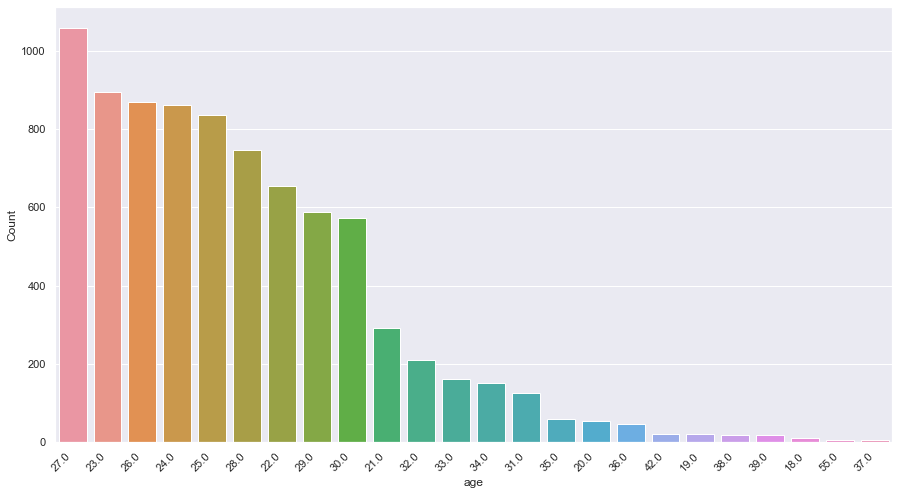

In [18]:
Hist_Plot('age')

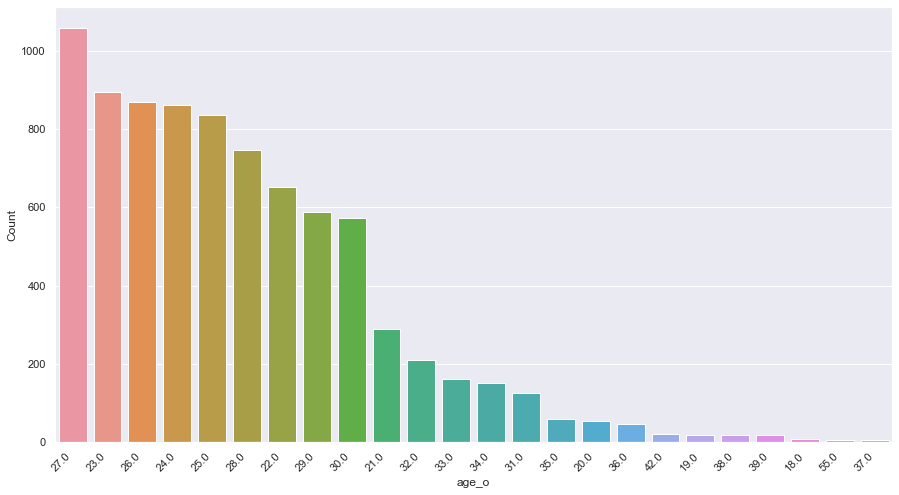

In [19]:
Hist_Plot('age_o')

* From the above two, we notice that the age_o and age columns are the same, so we will drop one of them 

# For 'field' and 'field_cd' columns

**field: field of study**

**field_cd: field coded**
-    1= Law 
-    2= Math
-    3= Social Science, Psychologist 
-    4= Medical Science, Pharmaceuticals, and Bio Tech 
-    5= Engineering 
-    6= English/Creative Writing/ Journalism 
-    7= History/Religion/Philosophy 
-    8= Business/Econ/Finance 
-    9= Education, Academia 
-    10= Biological Sciences/Chemistry/Physics
-    11= Social Work 
-    12= Undergrad/undecided 
-    13=Political Science/International Affairs 
-    14=Film
-    15=Fine Arts/Arts Administration
-    16=Languages
-    17=Architecture
-    18=Other

From the report, As we can see the 'field_cd' is the label encoding for the column 'field' so we can drop this column.

# For 'career ' and 'career_c' columns

**career** What is your intended career?

**career_c: career coded**
- 1= Lawyer 
- 2= Academic/Research 
- 3= Psychologist 
- 4= Doctor/Medicine 
- 5=Engineer 
- 6= Creative Arts/Entertainment 
- 7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
- 8= Real Estate 
- 9= International/Humanitarian Affairs 
- 10= Undecided 
- 11=Social Work
- 12=Speech Pathology
- 13=Politics
- 14=Pro sports/Athletics
- 15=Other
- 16=Journalism
- 17=Architecture

From the report, As we can see the 'career_c' is the label encoding for the column 'career' so we can drop this column.

In [20]:
# Drop some selected columns 
# We don't drop the coded columns since the model can deal with numercial columns
df = df.drop(columns=['field','career','age'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 2583 to 6691
Columns: 155 entries, gender to amb3_3
dtypes: float64(140), int64(10), object(5)
memory usage: 10.3+ MB


### **Deal with Categorical columns**

* The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data.

* At the end of the day why do we care about using categorical values? There are 3 main reasons:

* We can define a custom sort order which can improve summarizing and reporting the data. In the example above, “X-Small” < “Small” < “Medium” < “Large” < “X-Large”. Alphabetical sorting would not be able to reproduce that order.
* Some of the python visualization libraries can interpret the categorical data type to apply approrpiate statistical models or plot types.
* Categorical data uses less memory which can lead to performance improvements.

* The simplest way to convert a column to a categorical type is to use astype('category') . We can use a loop to convert all the columns we care about using astype('category')

In [22]:
## categorical encoding of this cols except 'field' and 'career' we drop them
cols_to_exclude = ['undergra', 'tuition', 'from', 'zipcode', 'income']
for col in cols_to_exclude:
        df[col] = df[col].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 2583 to 6691
Columns: 155 entries, gender to amb3_3
dtypes: category(5), float64(140), int64(10)
memory usage: 10.1 MB


In [24]:
train_data_index = Tr_df.shape[0] # it will return 5909 the number of trained data in the original csv file
train_data_cleaned = df.iloc[:train_data_index] #Return the trained data 
train_data_cleaned_index = df.shape[0]
print(train_data_cleaned.shape)
test_data_index = Ts_df.shape[0]
print(test_data_index)
test_data_cleaned = df.iloc[train_data_index :]
print(test_data_cleaned.shape)
test_data_cleaned= test_data_cleaned.drop('match', axis=1)

(5909, 155)
2469
(2469, 155)


In [25]:
train_data_cleaned.info()#information for train data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Columns: 155 entries, gender to amb3_3
dtypes: category(5), float64(140), int64(10)
memory usage: 6.9 MB


In [26]:
test_data_cleaned.info()#information for test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 934 to 6691
Columns: 154 entries, gender to amb3_3
dtypes: category(5), float64(140), int64(9)
memory usage: 2.9 MB


In [27]:
X = train_data_cleaned.iloc[:, :] #take an object from the data
X = X.drop('match', axis=1)           
Y = train_data_cleaned['match']# The class label
print(X.shape) , print(Y.shape)
X.head(5)

(5909, 154)
(5909,)


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
id,,,,,,,,,,,,,,,,,,,,,
2583,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6830,1,14,1,3,10,2,NaN,8,8,63.0,...,20.00,15.00,20.00,10.00,15.00,6.0,8.0,8.0,7.0,8.0
4840,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5508,1,38,2,9,20,18,13.0,6,7,200.0,...,18.37,18.37,18.37,14.29,14.29,8.0,9.0,8.0,8.0,6.0
4828,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#extract numeric features and categorical features names
Numeric_features = list(X.select_dtypes(include=['float64', 'int64']))
Cat_features = list(X.select_dtypes(include=['category']))

* Models that will be used:

   1) **XGBClassifier** 
       - Grid Search
       - Bayesian Search
       - Random Search
   2) **GradientBoostingClassifier**
       - Grid Search
       - Bayesian Search
       - Random Search
   3) **ExtraTreesClassifier**
       - Grid Search
       - Bayesian Search
       - Random Search

4- ✔️ Model Tuning and Documentation

# Create Searching Functions & CSV creator.

In [119]:
#___________________________CSV creator Function____________________________________________________________
# This function which will be used to save the csv file 
def CSV_creator(model_name, obj_):
    # prepare submission:
    submission = pd.DataFrame()
    submission['id'] = Ts_df['id']
    submission['match'] = obj_.predict_proba(test_data_cleaned)[:,1]
    submission.to_csv(f'_{model_name}.csv', index=False)
                    
#___________________________Grid Search Function____________________________________________________________
# Create the grid search function which it will be used with three models to tune the hyperparameters                     
def grid_search_fun(pipeline, parameters, model_name):
    # cv means cross-validation
    # n_jobs means the cucurrent number of jobs
    grid_s = GridSearchCV(pipeline, parameters, cv=10, verbose=3, n_jobs=2, scoring='roc_auc')
    grid_s.fit(X, Y) # used to fit the model 

    # to show the best score and the best hyperparameters
    print('The Best Score : ',grid_s.best_score_)
    print('The Best Hyperparameter : ',grid_s.best_params_)

    # to creat the CSV file, we will call the function csv_creator
    CSV_creator(model_name,grid_s)
                    
#___________________________Randrom Search Function__________________________________________________________
                    
from sklearn.model_selection import RandomizedSearchCV
def random_search_fun(pipeline, parameters, model_name, itr):
    random_s = RandomizedSearchCV(pipeline, parameters, verbose=1, cv=10, n_iter=itr, n_jobs=2, scoring='roc_auc')
    random_s.fit(X, Y)

    print('The Best Score : ',random_s.best_score_)
    print('The Best Hyperparameter : ',random_s.best_params_)

    CSV_creator(model_name,random_s)                    
                    
#___________________________Bayesian Search Function_________________________________________________________
                    
from skopt import BayesSearchCV
def bayesian_search_fun(pipeline, parameters, model_name, itr):
    bayesian_s = BayesSearchCV(pipeline, parameters, cv=10, n_iter=itr, verbose=3, n_jobs=2, scoring='roc_auc')
    bayesian_s.fit(X, Y)

    print('The Best Score : ' , bayesian_s.best_score_)
    print('The Best Hyperparameter : ' , bayesian_s.best_params_)

    CSV_creator(model_name,bayesian_s)                   

## For creating pipeline

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# pipeline for numeric features preprocessing
# SimpleImputer:Univariate imputer for completing missing values with simple strategies.
# Standardize features by removing the mean and scaling to unit variance.
pip_numeric = Pipeline(
    steps=[ ('imputer', SimpleImputer()),
            ('scaler', StandardScaler())])
#_______________________________________________________________________________

# pipeline for categorical features preprocessing
# OneHotEncoder:Encode categorical features as a one-hot numeric array.
pip_categorical = Pipeline(
    steps=[ ('imputer', SimpleImputer(strategy='constant')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#_______________________________________________________________________________

# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[ ('num', pip_numeric, Numeric_features),
                    ('cat', pip_categorical, Cat_features)])

# For Creating the classifiers and Parameters

In [84]:
#_______________________________XGBClassifier__________________________________________________
XGB = XGBClassifier(  scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.02,
                        max_depth=11,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic',
                      seed = 2,
                      reg_alpha = 0.3)

XGB_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
  # wider range for number of estimators in the ensemble
 'my_classifier__n_estimators': [100,200,500], 
 'my_classifier__max_depth':[5,7,10,15],
 'my_classifier__subsample':[0.6,0.8,1],
 'my_classifier__colsample_bytree':[0.5,0.7,1]
 }

#______________________________GradientBoostingClassifier________________________________________

GBC = GradientBoostingClassifier(min_samples_split=500,
                                 subsample=0.8,
                                 random_state=42,
                                 max_depth=11,
                                 n_estimators=900,
                                 learning_rate=0.02)

GBC_param = {
      'preprocessor__num__imputer__strategy': ['mean'], 
      'my_classifier__max_depth':[6,8,10] ,
      'n_estimators':range(20,81,10)   
}
#_____________________________ExtraTreesClassifier_______________________________________________
ETC = ExtraTreesClassifier(n_estimators=900,
                           n_jobs=4,
                           min_samples_split=25,
                            min_samples_leaf=35)

ETC_params = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[11,12,13] ,
  
}

#_____________________________RandomForestClassifier_______________________________________________

RFC = RandomForestClassifier()

# using a wider range of parameters in this grid
RFC_params = {
 # trying different numeric imputation strategies, initial in template is 'median'
 # 'most_frequent' is the mode for a given feature
 'preprocessor__num__imputer__strategy': ['mean','median', 'most_frequent'],
 # wider range for number of estimators in the ensemble
 'my_classifier__n_estimators': [10,20,30,40,50,100],
 # wider range for maximum tree depth
 'my_classifier__max_depth':[5,10,20,30,50],
 # trying different criteria for measuring impurity
 'my_classifier__criterion':['gini','entropy'],
 # varying the number of features to include when computing the best split
 'my_classifier__max_features':['auto','sqrt','log2'],
 # assigning balanced weights to each class to handle imbalanced target
 # subsample computes weights based on each bootstrap sample or 'bag' 
 'my_classifier__class_weight':['balanced','balanced_subsample']
}

### ----------------------------------------------XGBClassifier--------------------------------------------------

# For using XGBClassifier using Random search

In [32]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', XGB)])

In [33]:
random_search_fun(full_pipline, XGB_params, 'XGBClassifier_RS', 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  3.7min finished


The Best Score :  0.8877654036272784
The Best Hyperparameter :  {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__subsample': 0.6, 'my_classifier__n_estimators': 500, 'my_classifier__max_depth': 7, 'my_classifier__colsample_bytree': 1}


# For using XGBClassifier using grid search

In [34]:
grid_search_fun(full_pipline, XGB_params, 'XGBClassifier_GS')

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   28.6s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 15.0min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 27.1min
[Parallel(n_jobs=2)]: Done 1148 tasks      | elapsed: 39.0min
[Parallel(n_jobs=2)]: Done 1564 tasks      | elapsed: 59.3min
[Parallel(n_jobs=2)]: Done 2044 tasks      | elapsed: 83.1min
[Parallel(n_jobs=2)]: Done 2160 out of 2160 | elapsed: 93.7min finished


The Best Score :  0.8880124727465726
The Best Hyperparameter :  {'my_classifier__colsample_bytree': 1, 'my_classifier__max_depth': 7, 'my_classifier__n_estimators': 500, 'my_classifier__subsample': 0.8, 'preprocessor__num__imputer__strategy': 'mean'}


# For using XGBClassifier using bayesian search

In [35]:
bayesian_search_fun(full_pipline, XGB_params, 'XGBClassifier_BS', 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   40.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   22.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   19.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   33.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   38.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   24.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   37.5s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   48.1s finished


The Best Score :  0.8880124727465726
The Best Hyperparameter :  OrderedDict([('my_classifier__colsample_bytree', 1.0), ('my_classifier__max_depth', 7), ('my_classifier__n_estimators', 500), ('my_classifier__subsample', 0.8), ('preprocessor__num__imputer__strategy', 'mean')])


### ----------------------------------------------GradientBoostingClassifier--------------------------------------------------

# **For using GradientBoostingClassifier using Random search**

In [52]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', GBC)])

In [53]:
random_search_fun(full_pipline, GBC_param, 'GradientBoostingClassifier_RS', 15)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 26.4min finished


The Best Score :  0.8870631656507614
The Best Hyperparameter :  {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__max_depth': 8}


# For using GradientBoostingClassifier using grid search

In [49]:
grid_search_fun(full_pipline, GBC_param, 'GradientBoostingClassifier_GS')

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 26.2min finished


The Best Score :  0.8870631656507614
The Best Hyperparameter :  {'my_classifier__max_depth': 8, 'preprocessor__num__imputer__strategy': 'mean'}


# For using GradientBoostingClassifier using bayesian search

In [54]:
bayesian_search_fun(full_pipline, GBC_param, 'GradientBoostingClassifier_BS', 5)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  8.9min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  7.0min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  8.9min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  7.1min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed: 16.4min finished


The Best Score :  0.8870631656507614
The Best Hyperparameter :  OrderedDict([('my_classifier__max_depth', 8), ('preprocessor__num__imputer__strategy', 'mean')])


### --------------------------------------------ExtraTreesClassifier---------------------------------------------

# **For using ExtraTreesClassifier using Random search**

In [67]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', ETC)])

In [68]:
random_search_fun(full_pipline, ETC_params, 'ExtraTreesClassifier_RS', 10)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  4.9min finished


The Best Score :  0.8632085790029581
The Best Hyperparameter :  {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__max_depth': 11}


# For using ExtraTreesClassifier using grid search

In [69]:
grid_search_fun(full_pipline, ETC_params, 'ExtraTreesClassifier_GS')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  4.9min finished


The Best Score :  0.8638499061644351
The Best Hyperparameter :  {'my_classifier__max_depth': 13, 'preprocessor__num__imputer__strategy': 'mean'}


# For using ExtraTreesClassifier using bayesian search

In [70]:
bayesian_search_fun(full_pipline, ETC_params, 'ExtraTreesClassifier_BS', 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   52.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   48.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   52.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   48.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   51.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   48.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   52.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   45.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   52.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   45.8s finished


The Best Score :  0.8636177109339714
The Best Hyperparameter :  OrderedDict([('my_classifier__max_depth', 12), ('preprocessor__num__imputer__strategy', 'mean')])


### --------------------------------------------RandomForestClassifier---------------------------------------------

# For using RandomForestClassifier using grid search

In [77]:
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', RFC)])

In [78]:
grid_search_fun(full_pipline, RFC_params, 'RandomForestClassifier_GS')

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   23.9s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  8.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=2)]: Done 1148 tasks      | elapsed: 22.7min
[Parallel(n_jobs=2)]: Done 1564 tasks      | elapsed: 34.9min
[Parallel(n_jobs=2)]: Done 2044 tasks      | elapsed: 49.2min
[Parallel(n_jobs=2)]: Done 2588 tasks      | elapsed: 81.7min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 92.6min
[Parallel(n_jobs=2)]: Done 3868 tasks      | elapsed: 114.0min
[Parallel(n_jobs=2)]: Done 4604 tasks      | elapsed: 135.5min
[Parallel(n_jobs=2)]: Done 5404 tasks      | elapsed: 159.2min
[Parallel(n_jobs=2)]: Done 6268 tasks      | elapsed: 176.1min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 203.

The Best Score :  0.8727903727223915
The Best Hyperparameter :  {'my_classifier__class_weight': 'balanced_subsample', 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 30, 'my_classifier__max_features': 'auto', 'my_classifier__n_estimators': 100, 'preprocessor__num__imputer__strategy': 'mean'}


# **For using RandomForestClassifier using Random search**

In [91]:
random_search_fun(full_pipline, RFC_params, 'RandomForestClassifier_RS', 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  2.6min finished


The Best Score :  0.8653452836266142
The Best Hyperparameter :  {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 100, 'my_classifier__max_features': 'sqrt', 'my_classifier__max_depth': 30, 'my_classifier__criterion': 'entropy', 'my_classifier__class_weight': 'balanced_subsample'}


# **For using RandomForestClassifier using bayesian search**

In [87]:
bayesian_search_fun(full_pipline, RFC_params, 'RandomForestClassifier_BS', 10)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   28.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   14.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   17.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   36.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   26.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   21.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.6s finished


The Best Score :  0.8642856566427236
The Best Hyperparameter :  OrderedDict([('my_classifier__class_weight', 'balanced_subsample'), ('my_classifier__criterion', 'gini'), ('my_classifier__max_depth', 20), ('my_classifier__max_features', 'sqrt'), ('my_classifier__n_estimators', 100), ('preprocessor__num__imputer__strategy', 'median')])


5- ✔️ Answer some of questions (briefly)

### ---------------------------------------------------------------The Questions---------------------------------------------------------

* 🌈Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?
* 🌈What's a decision tree and how it is different to a logistic regression model?
* 🌈What's the difference between grid search and random search?
* 🌈What's the difference between bayesian search and random search?

### ---------------------------------------------------------------Answer The Questions---------------------------------------------------------

* 🌈Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

**A simple linear regression model without any activation function is not well-suited for classification tasks for several reasons:**

*    1) Output range: Linear regression models predict a continuous output variable, which can take any value on the real number line. In contrast, for binary classification tasks (e.g. classifying images as cat or not cat), the output should be a binary value (0 or 1). For multi-class classification tasks (e.g. classifying images into several categories), the output should be categorical, with each category corresponding to a unique value.

*    2) Sensitivity to outliers: Linear regression models are sensitive to outliers, meaning that they can be heavily influenced by data points that are far from the main cluster of data. This can cause the model to predict extreme values, which may not be suitable for classification tasks where the output values should be well-defined.

*    3) Non-linear decision boundaries: Linear regression models fit a straight line to the data, which may not be flexible enough to capture complex decision boundaries in classification tasks. For example, consider a dataset where the two classes are separated by a curved boundary. A linear regression model may not be able to capture this curved boundary and would perform poorly on this task.

**Perceptron and logistic regression models, on the other hand, are specifically designed for classification tasks and address these limitations:**

*    1) Output range: Perceptron and logistic regression models use an activation function to map the output to a specific range (e.g. sigmoid function maps the output to the range [0, 1]). This ensures that the output is appropriate for classification tasks.

*    2) Robustness to outliers: Perceptron and logistic regression models are less sensitive to outliers compared to linear regression models. This is because the activation function limits the output range, and the optimization algorithm focuses on minimizing the classification error rather than the residual error.

*    3) Non-linear decision boundaries: Perceptron and logistic regression models can use non-linear activation functions to model complex decision boundaries. For example, a neural network with multiple layers and non-linear activation functions can capture highly complex decision boundaries.

**Overall, a simple linear regression model is not a suitable choice for classification tasks due to its limitations. Perceptron and logistic regression models, on the other hand, are specifically designed for classification tasks and are more appropriate.**

🌈What's a decision tree and how it is different to a logistic regression model?

* A decision tree is a type of supervised learning algorithm used in machine learning and data mining. It is a hierarchical model that recursively splits the dataset into subsets based on the most important features, with each split aiming to maximize the difference in outcome between the resulting subsets. At each node of the tree, a decision is made based on a feature value to move to the next node, until a leaf node is reached that corresponds to a predicted outcome.

* In contrast, logistic regression is a type of statistical model used to model the probability of a binary outcome (e.g. yes/no or 0/1). Logistic regression models the relationship between the dependent variable and one or more independent variables, using a logistic function to map the linear output of the model to a probability score.

**The main differences between decision trees and logistic regression models are as follows:**

* Model structure: Decision trees are hierarchical models, consisting of a root node, internal nodes, and leaf nodes, whereas logistic regression is a linear model that uses a logistic function to map the output to a probability score.

* Interpretability: Decision trees are highly interpretable, as they can be visualized and easily understood by non-technical users. Logistic regression models are less interpretable, as the relationship between the independent variables and the dependent variable is modeled as a linear combination of coefficients, which may not be easily understood.

* Non-linear relationships: Decision trees are able to model non-linear relationships between the dependent variable and the independent variables by recursively splitting the data based on the most important features. Logistic regression models assume a linear relationship between the independent variables and the dependent variable, unless non-linear terms or interactions are explicitly included in the model.

* Overfitting: Decision trees are prone to overfitting the data, especially if the tree is too complex or if the data has a lot of noise. Logistic regression models are less prone to overfitting and are generally more robust, especially if regularization techniques are used.

**In summary, decision trees and logistic regression models are both popular supervised learning algorithms, but differ in their model structure, interpretability, ability to model non-linear relationships, and tendency to overfit the data. The choice of which model to use depends on the specific characteristics of the data and the modeling objectives.**

🌈What's the difference between grid search and random search?

* Grid search and random search are two commonly used hyperparameter optimization techniques used in machine learning. Both methods are used to search for the best set of hyperparameters for a given machine learning model, but they differ in their search strategy.

* Grid search is a method where a pre-defined set of hyperparameters is selected, and the model is trained on all possible combinations of hyperparameters in a grid-like manner. The search is typically guided by a predefined range of values for each hyperparameter, and each combination is evaluated by a cross-validation procedure to estimate its performance on unseen data. Grid search is a systematic approach to hyperparameter optimization that exhaustively searches all possible combinations of hyperparameters, and it is suitable for cases where the search space is small and the computational cost is affordable.

* In contrast, random search is a method where hyperparameters are randomly sampled from a pre-defined range of values, and the model is trained on a random subset of these combinations. Random search is a more flexible approach that can explore a wider range of hyperparameters and does not require predefining a grid-like search space. It can be computationally cheaper than grid search, especially when the search space is large.

**The main differences between grid search and random search are:**

1) Search strategy: Grid search searches all possible combinations of hyperparameters, while random search selects hyperparameters randomly.

2) Computation cost: Grid search can be computationally expensive, especially when the search space is large, while random search is typically less expensive.

3) Search space: Grid search requires a pre-defined search space for hyperparameters, while random search only requires a range of values for each hyperparameter.

4) Performance: Grid search can guarantee finding the optimal combination of hyperparameters if the search space is small and the performance metric is well-defined, while random search is less guaranteed to find the optimal combination, but can still perform well, especially if the search space is large.

**In summary, grid search and random search are two widely used hyperparameter optimization techniques, each with its own advantages and disadvantages. Grid search is more systematic and can guarantee finding the optimal combination, while random search is more flexible and less computationally expensive, but may not guarantee finding the optimal combination. The choice of which method to use depends on the specific characteristics of the problem, the size of the search space, and the computational resources available.**

🌈What's the difference between bayesian search and random search?

* Both Bayesian search and random search are methods used for hyperparameter tuning in machine learning models. The main difference between the two approaches is the way they explore the hyperparameter space.

* Random search selects hyperparameters randomly from a given search space. It doesn't use any prior knowledge about the performance of the model on the dataset. Therefore, it requires a larger number of iterations to find the optimal hyperparameters, as compared to other methods.

* Bayesian search, on the other hand, uses probability distributions to select hyperparameters. It uses prior knowledge about the performance of the model on the dataset to update the probability distribution of the hyperparameters after each iteration. This helps to select the most promising hyperparameters based on the previous results, which can lead to a faster convergence to the optimal hyperparameters.

**In summary, random search is a simpler and more straightforward method for hyperparameter tuning, but it may require a larger number of iterations to find the optimal hyperparameters. Bayesian search is a more complex method that requires more computational resources, but it can converge to the optimal hyperparameters faster by leveraging previous results.**